<b>Machine Learning Exercise session: 30 September 2025</b>

# <b>Working with: Evaluation of Classification algorithms</b>

Welcome to this week's exercise session. Today, we will learn about how to evaluate the performance of your machine learning models to make sure they perform well on new, unseen data. This notebook will take you through 
- Classification metrics: accuracy, f1-score, precision, recall
    - Pitfalls of accuracy & the importance of class distribution
    - Choosing which metric to prioritise
    - How to implement these metrics mathematically and in code
- Confusion matrices for binary and multi-class classification
- Using performance metrics to assess underfitting and overfitting / bias and variance
- A discussion on how to interpret metric scores on a case-by-case basis


Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, read documentation if needed. <b>We are happy to help if you are stuck.</b>

Have fun! 

## <b>Theoretical exercises</b>

### Exercise t1

### Performance metrics - Binary classification
For the following exercise, assume we are working with a binary classification task with two possible labels, 0 and 1.     
We have obtained the following predicted labels from our model (the model definition and the used data is irrelevant for this task):    

$\texttt{predicted} = [ 0,1,1,0,0,0,1,0,1,0,1]$   

We also have access to the true labels for the same dataset we have predicted for:    

$\texttt{target} = [ 1,1,1,0,0,1,1,0,0,1,1]$ 

**Tasks**  
- Calculate the accuracy, precision, recall and F1-score by hand (or by code without using any libraries)
- Implement and calculate the above metrics using sklearn (and check your previous solution)

**Useful documentation**  
(for both the binary and multi-class parts)    
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [8]:
predicted = [0,1,1,0,0,0,1,0,1,0,1]
target = [1,1,1,0,0,1,1,0,0,1,1]
#0 is negative, 1 is postive
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(predicted)):
    if predicted[i] == target[i] and predicted[i] == 0:
        TN +=1
    elif predicted[i] == target[i] and predicted[i] == 1:
        TP +=1
    elif predicted[i] != target[i] and predicted[i] == 1:
        FP +=1
    elif predicted[i] != target[i] and predicted[i] == 0:
        FN +=1
accuracy = (TP+TN) /len(predicted)
preci = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2 * (preci*recall)/(preci+recall)
    
print(accuracy,preci,recall,F1)
# Your solution to t1 goes here

accuracy_score(target,predicted), recall_score(target,predicted), precision_score(target, predicted), f1_score(target, predicted)

0.6363636363636364 0.8 0.5714285714285714 0.6666666666666666


(0.6363636363636364, 0.5714285714285714, 0.8, 0.6666666666666666)

### Performance metrics - Multi-class classification
For the following exercise, assume we are working with a multi-class classification task with four possible labels, denoted 0, 1, 2 and 3.     
We have obtained the following predicted labels from our model (the model definition and the used data is irrelevant for this task):    

$\texttt{predicted} = [ 2,1,3,1,0,3,1,2,2,3,1]$   

We also have access to the true labels for the same dataset we have predicted for:    

$\texttt{target} = [ 2,1,1,2,3,3,1,2,0,3,1]$ 

**Tasks**  
- Calculate the accuracy, as well as the macro precision, recall and F1-score by hand (or by code without using any libraries)
- Implement and calculate the above metrics using sklearn (and check your previous solution)

In [16]:
predicted2 = [2,1,3,1,0,3,1,2,2,3,1]
target2 = [2,1,1,2,3,3,1,2,0,3,1]

classes = set(target2)
TP = {c:0 for c in classes}
FP = {c:0 for c in classes}
FN = {c:0 for c in classes}


for t, p in zip(target2, predicted2):
    if t == p:
        TP[t] +=1
    else:
        FP[p]+=1
        FN[t]+=1


for c in classes:
    precision_c = TP[c]/(TP[c]+FP[c])
    recall_c = TP[c]/(TP[c]+FN[c])
    f1_c = 2* (recall_c*precision_c)/(recall_c+precision_c) if (precision_c + recall_c) != 0 else 0
    print(f"Class {c}: Precision={precision_c}, Recall={recall_c}, F1={f1_c}")




accuracy_score(target2,predicted2), recall_score(target2,predicted2, average="macro"),precision_score(target2,predicted2, average="macro"),f1_score(target2,predicted2, average="macro")
# Your solution to t1 goes here

Class 0: Precision=0.0, Recall=0.0, F1=0
Class 1: Precision=0.75, Recall=0.75, F1=0.75
Class 2: Precision=0.6666666666666666, Recall=0.6666666666666666, F1=0.6666666666666666
Class 3: Precision=0.6666666666666666, Recall=0.6666666666666666, F1=0.6666666666666666


(0.6363636363636364,
 0.5208333333333333,
 0.5208333333333333,
 0.5208333333333333)

### Exercise t2
Depending on the task you are working with, it might make sense to prioritise a certain performance metric.   
Given the following situations, which of the above mentioned metrics would you prioritise and why? (out of accuracy, f1-score, precision, recall)    
- a) Predicting whether a patient has a disease that is highly deadly without treatment
- b) A classification task with 4 classes where the consequences for any type of mistake are equally severe, and the majority of the training data belongs to the second class
- c) A classification task with 4 classes where the consequences for any type of mistake are equally severe and there's an approximately equal amount of data points from each class   
- d) Predicting whether an email is spam or not. If the email is predicted as spam, it is permanently deleted.

In [4]:
# Your solution to t2 goes here
""" 
recall = TP/TP+FN, precision = TP/TP+FP

a) High accuracy, but also a high recall would be ideal. As we want as few false negatives as possible.
b) High accuracy, maybe also a high F1 score. A high F1 score means we both ahve a high precision and high recall
meaning we will have low amount of errors. Accuracy might be wrong,  which can be because of the high class imbalance.
c) In the previous we would probably set F1 higher than accuracy due to the imbalance. 
Where as accuracy might be more precise here, as the classes are balanced. F1 score of course still gives us some idea
on how recall and precision are performing.
d) In this scenario, we want to focus on precision, because predicting an email as spam leads to permanent deletion. 
High precision ensures that when the system flags an email as spam, it is very likely truly spam. 
We can tolerate some false negatives (spam not detected) to avoid the more severe consequence of deleting an important email.






"""

### Exercise t3

Consider the following confusion matrix corresponding to a binary classification task of predicting whether an image is a cat or a dog:

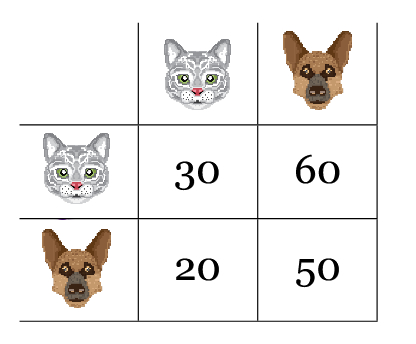

**Tasks**
- What are the precision, recall and f1-score if you consider "cat" as the "positive class"?   
- What are the precision, recall and f1-score if you consider "dog" as the "positive class"?   
- Reflect on your findings: Does switching which class is the "positive class" affect the evaluation metrics?
- What would be the test error (expected loss) when loss is evaluated with the following loss matrix:

    $ L = \begin{bmatrix}0 & 2 \\ 1 & 0\end{bmatrix}$

In [29]:
# Your solution to t3 goes here



L12 = 2*60
L21=1*20
expected_loss = (L12+L21)/(30+60+20+50)
expected_loss

0.875

### Exercise t4

Consider the following confusion matrix corresponding to a 3 class classification task of predicting whether an image is a cat, a dog or a fox:

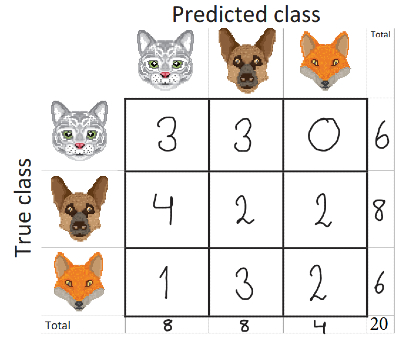

**Tasks**   
- Fill out the table  
- Calculate the macro-F1 score and accuracy

| Class | Precision | Recall | F1-score |
| :- | :-: | :-: | :-: |
| Cat | 0.0 | 0.0  | 0.0 |
| Dog | 0.0 | 0.0  | 0.0 |
| Fox | 0.0 | 0.0  | 0.0 |

(You can double click the above markdown cell to fill in the table in markdown, or just calculate each value separately and note it down (or save as a variable))

In [27]:
# Your solution to t4 goes here
#recall = TP/TP+FN, precision = TP/TP+FP


cat_tp = 3
cat_fn  = 3
cat_tn= 4
cat_fp = 5

recall_cat = cat_tp/(cat_tp+cat_fn)
precision_cat = cat_tp/(cat_tp+cat_fp)
f1_cat = 2* (recall_cat*precision_cat)/(recall_cat + precision_cat)


dog_tp = 2
dog_fn = 6
dog_tn = 5
dog_fp = 6
recall_dog = dog_tp/(dog_tp+dog_fn)
precision_dog = dog_tp/(dog_tp+dog_fp)
f1_dog = 2* (recall_dog*precision_dog)/(recall_dog + precision_dog)

fox_tp = 2
fox_fn = 4
fox_tn = 5
fox_fp = 2
recall_fox = fox_tp/(fox_tp+fox_fn)
precision_fox = fox_tp/(fox_tp+fox_fp)
f1_fox = 2* (recall_fox*precision_fox)/(recall_fox + precision_fox)


print(recall_cat,precision_cat,f1_cat)
print(recall_dog,precision_dog,f1_dog)
print(recall_fox,precision_fox,f1_fox)

0.5 0.375 0.42857142857142855
0.25 0.25 0.25
0.3333333333333333 0.5 0.4


### Open discussion   
(Discuss with some classmates for a few minutes, then we all discuss it together)
- What could we compare the metrics of our model to, in order to figure out if it's performing well?    
- Is there some value of a metric that we always expect to be "good enough" (let's say as an example 80% accuracy), or does this depend on a case by case basis? If so, what can it depend on?  
- Should we still pay attention to the model's performance on the training set it was trained on, or should we only focus on the evaluation and test performance?

# <b>Applying what you learned</b>

### Documentation
- Train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Models: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Evaluation metrics:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Generating data: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
- Plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- Encoding categorical features: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
- Drop columns: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html


### Exercise a1
In this exercise we will take a look at the effect of class distribution on classification metrics.   
Let's imagine the scenario of a medical dataset consisting of healthy individuals, as well as some suffering from a highly deadly but very rare disease, which only consists of 5% of the records in our dataset.    
For this exercise, we will create a synthetic dataset to reflect this class distribution and evaluate the effect of the highly unbalanced classes on the evaluation metrics.

### a) Generate the data  
- Generate a synthetic dataset of 20 000 points using the class conditional probabilities  

   $$
   p(x \mid (y=0)) \sim \mathcal N(0,1), \qquad
   p(x \mid (y=1)) \sim \mathcal N(2,1)
   $$
   
   - With 5% of the total generated records being from class 1 (disease) ($ \ p(y=1)=0.05$)
   - Plot the class distribution of the target labels
- Split the generated data into a training and test set, preserving the original distribution of labels (_Hint: stratify_) 

In [30]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

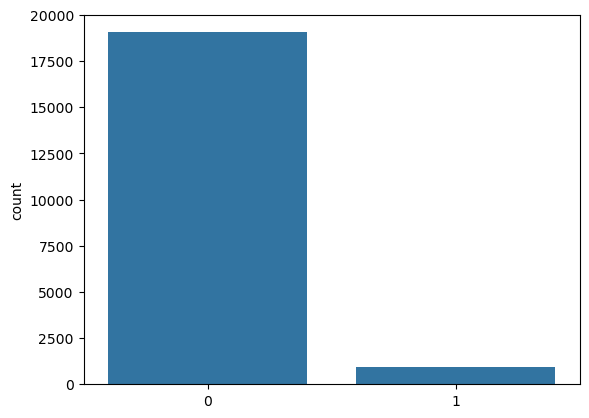

In [41]:
# Your solution to a1 part a) goes here
import numpy as np
import seaborn as sns
classes = [0,1]
probabilities = [0.95,0.05]
n = 20000
y = np.random.choice(classes, size = 20000,p=probabilities)
classes, counts = np.unique(y, return_counts=True)
sns.countplot(x=y)


y_train,y_test = train_test_split(y,test_size=0.2,random_state=42,stratify=y)


### b) Unbalanced data and accuracy
- Imagine a model which always predicts the class 0 (no disease). Let's consider how we expect evaluation metrics to look like for this model's predictions:
    - What would you expect the accuracy of such a model to be on the training and test set? 
    - What about precision, recall and F1-score?
    - What do you expect the confusion matrix to look like?
- Test out your thoughts from c) by code  
- Reflect on your findings: Do you think accuracy is a good metric to consider in this scenario? Why / why not? What about the other metrics?   
- Extra exercise: What type of classifier would you use given this particular data and scenario? Motivate your answer and test it out by code.

In [72]:
from sklearn.linear_model import LogisticRegression
n_class0 = int(n * 0.95)
n_class1 = n - n_class0
X_class0 = np.random.normal(loc=0, scale=1, size=(n_class0, 5))
X_class1 = np.random.normal(loc=1, scale=1, size=(n_class1, 5))
X = np.vstack([X_class0, X_class1])
y = np.array([0]*n_class0 + [1]*n_class1)


indices = np.random.permutation(n)
X = X[indices]
y = y[indices]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.966
Precision: 0.756
Recall: 0.480
F1 Score: 0.587


Depending on how much the classes overlap, the metrics differ. If there is good seperation we will result in a good metric overall.
though as soo nas they dont, we see a big decrease in recall and precision.

<Axes: ylabel='count'>

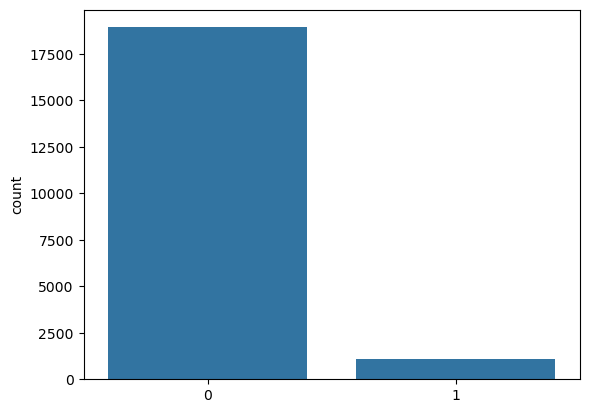

In [69]:
# Your solution to a1 part b) goes here
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
""" 
I could dexpect accuracy to be heigh(class imbalance), but with a bad f1 score, but with high recall but low precision.
"""
#I use make_classification instead of np.normal as it just easier to generate a dataset
#Still correct weight and number of observations.
X, y = make_classification(
    n_samples=n,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall
sns.countplot(x=y)

### Exercise a2

### Dataset
In this exercise we will be working with the Mushroom dataset (available at https://archive.ics.uci.edu/dataset/73/mushroom). The dataset contains ~8000 data points from 23 species of mushrooms, out of which some are edible and some are poisonous. The features include characteristics regarding the appearance of the mushroom, as well as other information such as the smell, habitat, etc.  
In this exercise we will be working with the following columns from the mushroom dataset: 
- Cap shape (column name: "x")
    - Values: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- Cap color (column name: "s")
    - Values: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- Population type (column name: "s.3")
    - Values: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- Poisonous - Target variable -  (column name: "p")
    - Values: edible=e, poisonous=p
    
### a) Load and preprocess the data
- Load the data from the provided file "mushroom.csv"
    - Keep only the columns mentioned in the "Dataset" part (p,x,s,s.3)
    - One hot encode the features
    - Encode the labels: "edible" as 0 and "poisonous" as 1
    - Split the data into a train and test set (80-20)

In [180]:
# Your solution to a2 part a) goes here
import pandas as pd
columns = ["p","x","s","s.3"]
df = pd.read_csv("mushroom.csv", header=None, usecols=[0,1,5,21], names=columns)
df["p"] = df["p"].map({"e": 0, "p": 1})
features = pd.get_dummies(df.drop("p", axis=1), dtype=int)
target = df["p"]
#features = df.drop("p", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42, stratify=target)
target.value_counts() # Pretty balanced, so no stratify. Most likely equal in test.
features

,x_b,x_c,x_f,x_k,x_s,x_x,s_a,s_c,s_f,s_l,...,s_n,s_p,s_s,s_y,s.3_a,s.3_c,s.3_n,s.3_s,s.3_v,s.3_y
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8121,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### b) Create logistic regression model
- Create a logistic regression model on the training data and predict for both training and test
    - What probability threshold does this model use for predicting a mushroom as poisonous?
- Create a function which prints the accuracy, precision, recall, f1-score and confusion matrix for a given set of true values $y$ and predicted values $\hat{y}$
- Inspect the train and test metrics and confusion matrix - What do you observe?

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Your solution to a2 part b) goes here
logistic = LogisticRegression(max_iter=1000)
#I guess the model would use a baseline 0.5 for differing between posionous and not.
logistic.fit(X_train,y_train)
y_train_pred = logistic.predict(X_train)
y_pred = logistic.predict(X_test)

def print_metrics(y_pred, y_true):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    print("Accuracy: ", accuracy, "Recall: ", recall, "Precision", precision, "F1_score", f1)
    print(confusion_matrix(y_true,y_pred))
    print(classification_report(y_true, y_pred))


#print_metrics(y_pred,y_test)
print_metrics(y_train_pred,y_train)


Accuracy:  0.9850746268656716 Recall:  0.969039259495691 Precision 1.0 F1_score 0.984276219808721
[[3366    0]
 [  97 3036]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3366
           1       1.00      0.97      0.98      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.98      0.99      6499
weighted avg       0.99      0.99      0.99      6499



### c) Inspect the effect of a threshold change on the metrics
- Use the same model to predict probabilities of each data point being in class 1 (poisonous) instead of directly predicting the labels (_Hint: predict_proba_))  
- Create a function that, given the predicted probabilities and a threshold, labels all predictions above or equal to the threshold as class 1, and all under as class 0
- Predict labels with the threshold $0.4$. Before looking at the results, what changes you expect to see in each of the metrics and in the confusion matrix? Use the function you created in b) to check your thoughts.
- Repeat the step above with the threshold $0.6$. What do you observe?
- Which threshold (between $0.4$, $0.5$ and $0.6$) would you use for this scenario? Motivate your answer.

In [183]:
# Your solution to a2 part c) goes here

def proba(probabilities,threshold):
    y_class1_assign = probabilities[:,1]
    y_pred = (y_class1_assign >= threshold).astype(int)
    print(print_metrics(y_pred,y_test))
thresholds = [0.4,0.5,0.6]

for i in thresholds:
    proba(logistic.predict_proba(X_test),i)
#Treshold 0.4 seems to be the best solution if we look at f1 score and accuracy.
#This one produces the highest of both, even though all the others have precision of 1.

Accuracy:  0.9883076923076923 Recall:  0.9821200510855683 Precision 0.9935400516795866 F1_score 0.9877970456005138
[[837   5]
 [ 14 769]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       842
           1       0.99      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

None
Accuracy:  0.9858461538461538 Recall:  0.9706257982120051 Precision 1.0 F1_score 0.9850939727802981
[[842   0]
 [ 23 760]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       842
           1       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

None
Accuracy:  0.9858461538461538 Recall:  0.9706257982120051 Precision 1.0 F1_

# <b>Exploring what you learned</b>

### Documentation
- Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Model: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Evaluation metrics:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Plots: 
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    - https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Exercise e1
We will revisit a previous dataset of classifying wine types based on chemical data, now with new tools to better evaluate our classifiers.   

### a) Load and split the data
- a) Load the wine dataset from sklearn and plot the class distribution of the target labels
- b) Split the dataset into a training, evaluation and test set
- c) Given the class distribution and the task in question, what evaluation metric(s) would you prioritise?

In [121]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

,alcohol,malic_acid,hue
0,14.23,1.71,1.04
1,13.20,1.78,1.05
2,13.16,2.36,1.03
3,14.37,1.95,0.86
4,13.24,2.59,1.04
...,...,...,...
173,13.71,5.65,0.64
174,13.40,3.91,0.70
175,13.27,4.28,0.59
176,13.17,2.59,0.60


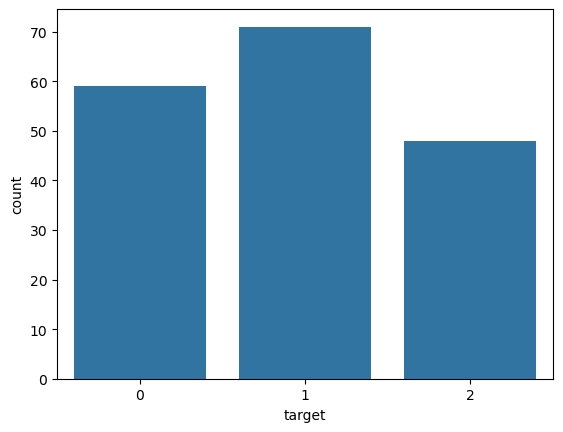

In [148]:
# Your solution to e1 part a) goes here
data= load_wine(as_frame=True)
features = data.data      # NumPy array of shape (n_samples, n_features)
target = data.target 
#Accuracy wont be as important, as the dataset is a bit imbalanced.
#Depending on what we want to achieve we either look at recall or precision
sns.countplot(x=target)
# Suppose features and target are X and y
features = features[["alcohol", "malic_acid", "hue"]]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    features, target, test_size=0.15, random_state=42, stratify=target
)

# Now split trainval into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1765, random_state=42, stratify=y_trainval
)
features

### b) Create KNN classifiers and calculate metrics
- Create five KNN classifiers using the features "alcohol", "malic acid" and "hue"
    - Use the numbers of neighbours {1, 3, 5, 8, 12}
    - Evaluate every model on the training and validation set using your metric(s) of choice
    - Choose a model out of the evaluated ones and motivate your answer. Once you have chosen a model, evaluate its performance on the test set.  
    - Plot the decision boundary of your chosen model

In [153]:
# Your solution to e1 part b) goes here
Neighbors = [1,3,5,8,12]
for n in Neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    y_val_pred = neigh.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    print(f"n_neighbors = {n}")
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}\n")




n_neighbors = 1
Accuracy: 0.852, Precision: 0.852, Recall: 0.852, F1: 0.850

n_neighbors = 3
Accuracy: 0.852, Precision: 0.865, Recall: 0.852, F1: 0.852

n_neighbors = 5
Accuracy: 0.815, Precision: 0.812, Recall: 0.815, F1: 0.809

n_neighbors = 8
Accuracy: 0.815, Precision: 0.812, Recall: 0.815, F1: 0.809

n_neighbors = 12
Accuracy: 0.852, Precision: 0.865, Recall: 0.852, F1: 0.852



In [156]:
from mpl_toolkits.mplot3d import Axes3D
neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(X_trainval, y_trainval)
y_true_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_true_pred )
precision = precision_score(y_test, y_true_pred , average='weighted')
recall = recall_score(y_test, y_true_pred , average='weighted')
f1 = f1_score(y_test, y_true_pred , average='weighted')
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}\n")




Accuracy: 0.889, Precision: 0.889, Recall: 0.889, F1: 0.887



/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


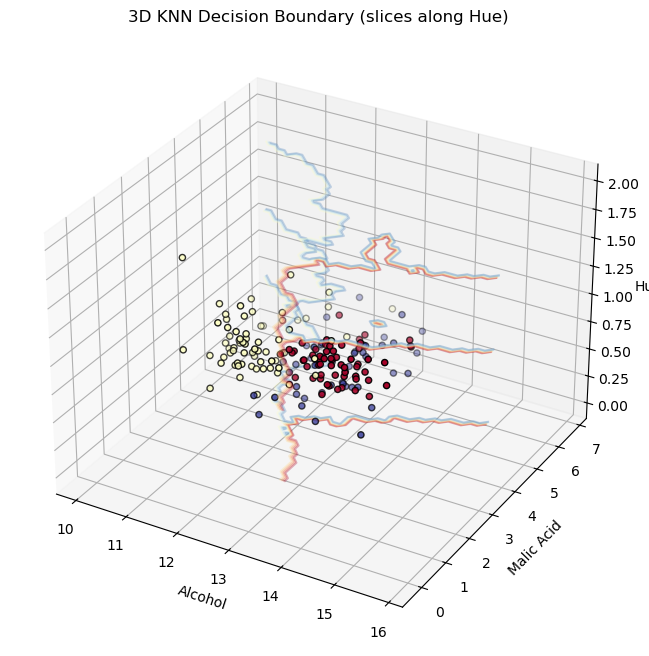

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

# Train KNN on the three features
X_plot = features[['alcohol','malic_acid','hue']]
y_plot = target
neigh.fit(X_plot, y_plot)

# Scatter plot of the data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_plot['alcohol'], X_plot['malic_acid'], X_plot['hue'], c=y_plot, edgecolor='k', cmap=plt.cm.RdYlBu)

# Define fixed values of hue to plot slices
hue_slices = np.linspace(X_plot['hue'].min(), X_plot['hue'].max(), 3)  # 3 slices

for h in hue_slices:
    # Create a grid for alcohol and malic_acid
    x_min, x_max = X_plot['alcohol'].min() - 1, X_plot['alcohol'].max() + 1
    y_min, y_max = X_plot['malic_acid'].min() - 1, X_plot['malic_acid'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    
    # Flatten and add fixed hue
    zz = np.full(xx.ravel().shape, h)
    grid_points = np.c_[xx.ravel(), yy.ravel(), zz]
    
    # Predict class for each point in the slice
    Z = neigh.predict(grid_points).reshape(xx.shape)
    
    # Plot decision boundary as a contour
    ax.contour(xx, yy, Z, zdir='z', offset=h, cmap=plt.cm.RdYlBu, alpha=0.3)

ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Hue')
plt.title('3D KNN Decision Boundary (slices along Hue)')
plt.show()


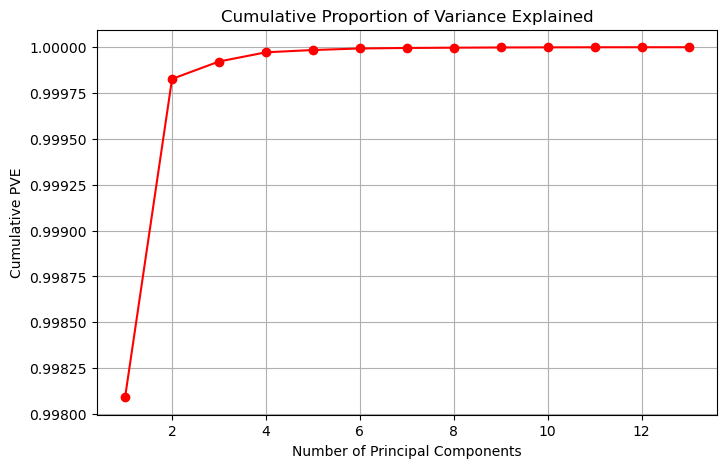

In [178]:
from sklearn.decomposition import PCA

# Select the three features
X = features[['alcohol','malic_acid','hue']]
features = data.data
# Reduce to 2 principal components
pca = PCA()
X_pca = pca.fit_transform(features)  # X = your feature matrix

# Proportion of variance explained (PVE)
pve = pca.explained_variance_ratio_

cumulative_pve = np.cumsum(pve)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pve)+1), cumulative_pve, marker='o', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative PVE')
plt.title('Cumulative Proportion of Variance Explained')
plt.grid(True)
plt.show()


### C) (Optional) Further improve the model  
- Let's improve on this model further. Read about what each feature represents and create a pairplot of the features to see which ones best separate the classes. Try out different values for the number of neighbours, as well as different sets of features to use in your model.  How much further did you manage to improve the model over the previous one, and what did you learn?

In [16]:
# Your solution to e1 part c) goes here